In [949]:
import pandas as pd


In [950]:
file_path = "/Users/emiliodulay/Documents/Programming/Math-42-Final-Project/GLHYD_data_metric.csv"
df = pd.read_csv(file_path)
df.shape

(1284, 7)

# Formatting

In [951]:
df.head(15)


,# Coordinated Monthly Mean Lakewide Average Water Levels,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,# Period of record: 1918-2023,NaN,NaN,NaN,NaN,NaN,NaN
1,"# Units: meters, IGLD 1985",NaN,NaN,NaN,NaN,NaN,NaN
2,# Calculated using the coordinated gage networ...,NaN,NaN,NaN,NaN,NaN,NaN
3,"# Superior: Marquette and Point Iroquois, MI; ...",NaN,NaN,NaN,NaN,NaN,NaN
4,"# Michigan-Huron: Harbor Beach, Mackinaw City ...",NaN,NaN,NaN,NaN,NaN,NaN
5,"# St. Clair: St. Clair Shores, MI and Belle Ri...",NaN,NaN,NaN,NaN,NaN,NaN
6,"# Erie: Toledo and Cleveland, OH; Port Stanley...",NaN,NaN,NaN,NaN,NaN,NaN
7,"# Ontario: Oswego and Rochester, NY; Cobourg, ...",NaN,NaN,NaN,NaN,NaN,NaN
8,#,NaN,NaN,NaN,NaN,NaN,NaN
9,# Last modified March 2024 Contact: Deanna.C.F...,NaN,NaN,NaN,NaN,NaN,NaN


In [952]:
notes = []
for i in range(0,10):
    notes.append(df.iloc[i,0])
    
notes


['# Period of record: 1918-2023',
 '# Units: meters, IGLD 1985',
 '# Calculated using the coordinated gage network, consisting of:',
 '# Superior: Marquette and Point Iroquois, MI; Duluth, MN; Michipicoten and Thunder Bay, Ontario',
 '# Michigan-Huron: Harbor Beach, Mackinaw City and Ludington, MI; Milwaukee, WI; Thessalon and Tobermory, Ontario',
 '# St. Clair: St. Clair Shores, MI and Belle River, Ontario',
 '# Erie: Toledo and Cleveland, OH; Port Stanley and Port Colborne, Ontario',
 '# Ontario: Oswego and Rochester, NY; Cobourg, Port Weller, Toronto, and Kingston, Ontario',
 '#',
 '# Last modified March 2024 Contact: Deanna.C.Fielder@usace.army.mil']

In [953]:
df.columns = df.iloc[11,:] # Rename columns to month, year and lake
df = df.iloc[12:,:].reset_index()
df = df.drop('index', axis = 1)
df.columns.name = 'index' # rename index column to index

In [954]:
df['month'] = df['month'].map({
                'jan' : 1,
                'feb' : 2,
                'mar' : 3,
                'apr' : 4,
                'may' : 5,
                'jun' : 6,
                'jul' : 7,
                'aug' : 8,
                'sep' : 9,
                'oct' : 10,
                'nov' : 11,
                'dec' : 12
                })

df.head()

index,month,year,Superior,Michigan-Huron,St. Clair,Erie,Ontario
0,1,1918,183.25,176.71,174.59,173.9,74.74
1,2,1918,183.2,176.73,174.74,173.82,74.72
2,3,1918,183.17,176.8,174.74,174.01,74.92
3,4,1918,183.14,176.89,174.84,174.02,75.1
4,5,1918,183.22,176.99,175,173.98,75.09


In [955]:
# Makes Lake a column 
df_melt = pd.melt(frame = df, 
                  id_vars = ["month", "year"], 
                  value_vars = ["Superior", "Michigan-Huron", "St. Clair", "Erie", "Ontario"],
                  var_name = "Lake",
                  value_name = "Water Level"
                  )

In [956]:
df_melt.shape

(6360, 4)

In [957]:
df.tail(5)

index,month,year,Superior,Michigan-Huron,St. Clair,Erie,Ontario
1267,8,2023,183.67,176.7,175.52,174.59,75.06
1268,9,2023,183.63,176.64,175.44,174.55,74.88
1269,10,2023,183.55,176.56,175.28,174.39,74.66
1270,11,2023,183.46,176.51,175.17,174.29,74.49
1271,12,2023,183.37,176.44,175.13,174.26,74.49


# Data Cleaning

In [958]:
df_melt['year'] = pd.to_numeric(df_melt['year'], errors = "raise")
df_melt['Water Level'] = pd.to_numeric(df_melt['Water Level'], errors = "raise")
df_melt.dtypes

month            int64
year             int64
Lake            object
Water Level    float64
dtype: object

In [959]:
df_melt.isna().sum()

month          0
year           0
Lake           0
Water Level    0
dtype: int64

In [960]:
df_melt.isnull().sum()

month          0
year           0
Lake           0
Water Level    0
dtype: int64

# Exploratory Data Analysis

In [961]:
# Average Water Level for every Lake for the entire time period.
mean_water_level_total = df_melt.groupby("Lake")["Water Level"].mean() 

# Average Water Level for every Lake for every month for the entire time period.
mean_water_level_month = df_melt.groupby(["Lake", "month"]).mean().reset_index().drop(columns = "year")
lakes_mean = []


for i in df_melt["Lake"].unique():
    i = mean_water_level_month[mean_water_level_month["Lake"] == i].reset_index().drop(columns = "index")
    lakes_mean.append(i)

isinstance(lakes_mean[0], pd.DataFrame) # A list of DataFrames. Each entry contains the mean water level per month for each lake over the entire period.

mean_water_level_total


Lake
Erie              174.176792
Michigan-Huron    176.450362
Ontario            74.769214
St. Clair         175.043569
Superior          183.414756
Name: Water Level, dtype: float64

In [962]:
# Creates a new data frame called "Lakes Summary Stats" which has the summary stats for every lake for all time
summary_stats = ['mean', 'std', 'median', 'min', 'max']
lakes_summary_stats = pd.DataFrame()

for i in range(0, len(lakes_mean)):    
    temp = lakes_mean[i].agg({
            'Water Level' : summary_stats
        })
    name = df_melt["Lake"].unique()[i]
    lakes_summary_stats[name] = temp
    

lakes_summary_stats.index.name = "water level"
lakes_summary_stats['Superior']

water level
mean      183.414756
std         0.112345
median    183.434387
min       183.242547
max       183.545660
Name: Superior, dtype: float64

In [963]:
lakes_summary_stats_2 = df_melt.groupby(['Lake', 'month']).agg({'Water Level' : summary_stats}).reset_index()
lakes_summary_stats_2[lakes_summary_stats_2["Lake"] == "Ontario"]["Water Level"]["mean"].mean()



df_melt[df_melt["Lake"] == "Ontario"]["Water Level"].describe()

count    1272.000000
mean       74.769214
std         0.344051
min        73.740000
25%        74.540000
50%        74.750000
75%        75.000000
max        75.910000
Name: Water Level, dtype: float64

# Our Model

In [964]:
import matplotlib.pyplot as plt

In [965]:
df = df_melt
df.head()


,month,year,Lake,Water Level
0,1,1918,Superior,183.25
1,2,1918,Superior,183.20
2,3,1918,Superior,183.17
3,4,1918,Superior,183.14
4,5,1918,Superior,183.22


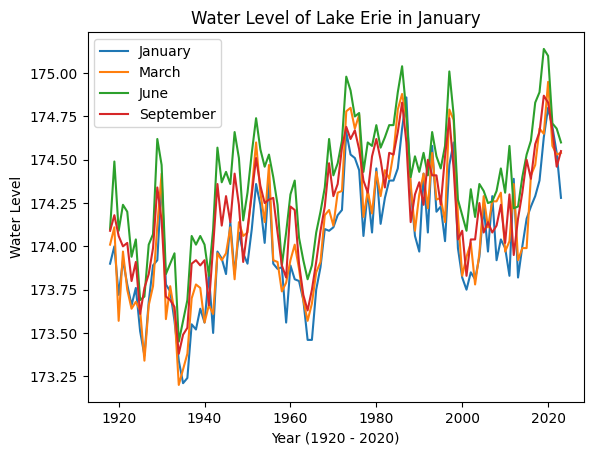

array(['Superior', 'Michigan-Huron', 'St. Clair', 'Erie', 'Ontario'],
      dtype=object)

In [966]:
erie = df[df["Lake"] == "Erie"].reset_index()
erie.head()


erie[erie["month"] == 1]["Water Level"]

plt.plot( erie[erie["month"] == 1]["year"],erie[erie["month"] == 1]["Water Level"], label = "January")
plt.plot( erie[erie["month"] == 3]["year"],erie[erie["month"] == 3]["Water Level"], label = "March")
plt.plot( erie[erie["month"] == 6]["year"],erie[erie["month"] == 6]["Water Level"], label = "June")
plt.plot( erie[erie["month"] == 9]["year"],erie[erie["month"] == 9]["Water Level"], label = "September")



plt.title('Water Level of Lake Erie in January')
plt.xlabel("Year (1920 - 2020)")
plt.ylabel("Water Level")
plt.legend()

plt.show()

df["Lake"].unique()


# See the water level from month to month has slight variation. How does the water level in a single month compare to between lakes.

In [967]:
lakes_summary_stats_2[lakes_summary_stats_2["month"] == 1].reset_index().drop("index", axis = 1)

/var/folders/69/ysm8yfcn76s_32xvcxfbp8s00000gn/T/ipykernel_40199/2660064425.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  lakes_summary_stats_2[lakes_summary_stats_2["month"] == 1].reset_index().drop("index", axis = 1)


Lake month Water Level                                   
                               mean       std   median     min     max
0            Erie     1  174.030189  0.351895  173.995  173.21  174.86
1  Michigan-Huron     1  176.324623  0.395824  176.350  175.57  177.26
2         Ontario     1   74.577830  0.274289   74.585   73.81   75.16
3       St. Clair     1  174.874057  0.425977  174.865  173.88  175.80
4        Superior     1  183.337642  0.171662  183.330  182.83  183.71

In [968]:
'''
'# Plot water levels in January on a logarithmic scale
plt.plot(
    ontario[(ontario["month"] == 1) & (ontario["year"] >= 2000)]["year"],  # X-axis
    ontario[(ontario["month"] == 1) & (ontario["year"] >= 2000)]["Water Level"],  # Y-axis
    label='January Water Levels (2000 and after)'
)


# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Water Level meters')
plt.title('Ontario January Water Levels (Logarithmic Scale)')
plt.legend()

# Display the plot
plt.show()
'

'''

'\n\'# Plot water levels in January on a logarithmic scale\nplt.plot(\n    ontario[(ontario["month"] == 1) & (ontario["year"] >= 2000)]["year"],  # X-axis\n    ontario[(ontario["month"] == 1) & (ontario["year"] >= 2000)]["Water Level"],  # Y-axis\n    label=\'January Water Levels (2000 and after)\'\n)\n\n\n# Set the y-axis to a logarithmic scale\nplt.yscale(\'log\')\n\n# Add labels, title, and legend\nplt.xlabel(\'Year\')\nplt.ylabel(\'Water Level meters\')\nplt.title(\'Ontario January Water Levels (Logarithmic Scale)\')\nplt.legend()\n\n# Display the plot\nplt.show()\n\'\n\n'

In [969]:
plt.plot(ontario[ontario["month"] == 1]["year"], ontario[ontario["month"] == 1]["Water Level"])
import matplotlib.pyplot as plt

# Function to simulate water level for a lake
def simulate_water_level(lake_df, initial_level, alpha, beta, gamma):
    levels = [initial_level]
    for t in range(1, len(lake_df)):
        precipitation = lake_df.loc[t, "precipitation"]
        evaporation = lake_df.loc[t, "evaporation"]
        flow = lake_df.loc[t, "flow"]
        # Compute water level change
        delta_H = (alpha * precipitation) - (beta * evaporation) - (gamma * flow)
        # print(f"t={t}, delta_H={delta_H}, levels[-1]={levels[-1]}")  # Debugging line
        new_level = levels[-1] + delta_H
        levels.append(new_level)
    return levels

# Example: Simulate for Lake Superior
initial_water_level = ontario["Water Level"].iloc[0]
print("Initial water level:", initial_water_level)  # Debugging line
ontario["simulated_water_level"] = simulate_water_level(
    ontario, initial_water_level, alpha=0.0256, beta=0.0122, gamma=0.00112
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ontario["simulated_water_level"], label="Simulated Water Level")
plt.axhline(y=176, color='red', linestyle='--', label='Optimal Water Level')
plt.title("Lake Michigan-Huron Water Level Simulation")
plt.xlabel("Time (Months)")
plt.ylabel("Water Level (m)")
plt.legend()
plt.grid()
plt.show()



KeyError: 'Water Level'

In [ ]:
df

,month,year,Lake,Water Level
0,1,1918,Superior,183.25
1,2,1918,Superior,183.20
2,3,1918,Superior,183.17
3,4,1918,Superior,183.14
4,5,1918,Superior,183.22
...,...,...,...,...
6355,8,2023,Ontario,75.06
6356,9,2023,Ontario,74.88
6357,10,2023,Ontario,74.66
6358,11,2023,Ontario,74.49


In [ ]:
import matplotlib.pyplot as plt

# Function to simulate water level for a lake
def simulate_water_level(lake_df, initial_level, alpha, beta, gamma):
    levels = [initial_level]
    for t in range(1, len(lake_df)):
        precipitation = lake_df.loc[t, "precipitation"]
        evaporation = lake_df.loc[t, "evaporation"]
        flow = lake_df.loc[t, "flow"]
        # Compute water level change
        delta_H = (alpha * precipitation) - (beta * evaporation) - (gamma * flow)
        # print(f"t={t}, delta_H={delta_H}, levels[-1]={levels[-1]}")  # Debugging line
        new_level = levels[-1] + delta_H
        levels.append(new_level)
    return levels

# Example: Simulate for Lake Superior
initial_water_level = lake_ontario_df["water level"].iloc[0]
print("Initial water level:", initial_water_level)  # Debugging line
lake_ontario_df["simulated_water_level"] = simulate_water_level(
    lake_ontario_df, initial_water_level, alpha=0.0256, beta=0.0122, gamma=0.00112
)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(lake_ontario_df["simulated_water_level"], label="Simulated Water Level")
plt.axhline(y=75, color='red', linestyle='--', label='Optimal Water Level')
plt.title("Lake Ontario Water Level Simulation")
plt.xlabel("Time (Months)")
plt.ylabel("Water Level (m)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Example synthetic dataset
# Year: 2000 to 2023
# Water Levels: Simulated values for January (log-transformed)
years = np.arange(2000, 2024)
water_levels = np.log10(
    np.array([
        74.3, 74.4, 74.5, 74.2, 74.6, 74.8, 75.0, 74.9, 74.7, 75.1, 75.3, 74.8, 74.5,
        74.6, 74.9, 75.2, 75.0, 74.7, 74.8, 74.9, 75.1, 75.4, 75.0, 74.7
    ])
)

# Polynomial regression model (degree 2 for simplicity)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(years.reshape(-1, 1))

# Fit the model
model = LinearRegression()
model.fit(X_poly, water_levels)

# Predict water levels
predicted_levels = model.predict(X_poly)

# Convert back from log scale for visualization
predicted_levels_normal = 10**predicted_levels

# Plot
plt.figure(figsize=(10, 6))
plt.plot(years, 10**water_levels, label="Observed Water Levels", marker="o")
plt.plot(years, predicted_levels_normal, label="Model (Polynomial Fit)", linestyle="--")
plt.title("Ontario January Water Levels (Model Fit)")
plt.xlabel("Year")
plt.ylabel("Water Level (meters)")
plt.legend()
plt.grid()
plt.show()


ModuleNotFoundError: No module named 'sklearn'

# Testing Features

In [1011]:
df = pd.read_csv('/Users/emiliodulay/Documents/Programming/Math-42-Final-Project/complete lakes df')
superior = pd.read_csv('/Users/emiliodulay/Documents/Programming/Math-42-Final-Project/lake superior df')

In [1012]:
superior.columns

Index(['month', 'year', 'lake', 'water level', 'evaporation', 'flow',
       'precipitation', 'simulated_water_level'],
      dtype='object')

In [1013]:
superior['precipitation'].describe()

count    852.000000
mean      75.649800
std       28.495887
min       10.400000
25%       56.350000
50%       73.975000
75%       92.187500
max      225.320000
Name: precipitation, dtype: float64

In [1014]:
superior['water level'].iloc[-400]

np.float64(183.53)

In [1015]:
superior.head()

,month,year,lake,water level,evaporation,flow,precipitation,simulated_water_level
0,1,1950,Superior,183.42,101.10,1612.18,106.56,183.420000
1,2,1950,Superior,183.37,89.08,951.42,68.37,183.416676
2,3,1950,Superior,183.33,82.57,2100.59,66.20,183.407859
3,4,1950,Superior,183.37,89.67,3057.59,62.78,183.393250
4,5,1950,Superior,183.57,125.15,868.02,59.98,183.386360


In [1016]:
print(f'{superior['precipitation'].diff().iloc[-400:].describe()}{superior['evaporation'].diff().iloc[-400:].describe()}{superior['flow'].diff().iloc[-400:].describe()}')


count    400.000000
mean       0.061425
std       40.667147
min     -194.920000
25%      -25.560000
50%        0.285000
75%       25.785000
max      137.850000
Name: precipitation, dtype: float64count    400.00000
mean       0.04810
std       21.97498
min      -64.86000
25%      -14.24750
50%        1.23500
75%       14.95000
max       67.20000
Name: evaporation, dtype: float64count     400.000000
mean       -3.104000
std       687.000936
min     -2835.960000
25%      -364.722500
50%        20.450000
75%       342.627500
max      2808.590000
Name: flow, dtype: float64


In [1017]:
superior['water level'].describe()

count    852.000000
mean     183.414472
std        0.208789
min      182.790000
25%      183.260000
50%      183.410000
75%      183.570000
max      183.910000
Name: water level, dtype: float64

In [1018]:
superior

,month,year,lake,water level,evaporation,flow,precipitation,simulated_water_level
0,1,1950,Superior,183.42,101.10,1612.18,106.56,183.420000
1,2,1950,Superior,183.37,89.08,951.42,68.37,183.416676
2,3,1950,Superior,183.33,82.57,2100.59,66.20,183.407859
3,4,1950,Superior,183.37,89.67,3057.59,62.78,183.393250
4,5,1950,Superior,183.57,125.15,868.02,59.98,183.386360
...,...,...,...,...,...,...,...,...
847,8,2020,Superior,183.81,119.69,270.27,84.40,183.084564
848,9,2020,Superior,183.79,128.17,-999.99,84.43,183.089863
849,10,2020,Superior,183.76,74.25,-999.99,77.31,183.098628
850,11,2020,Superior,183.71,90.07,-999.99,98.83,183.108835


[np.float64(183.47175000000001), 183.53, np.float64(-0.03), np.float64(0.0013899999999999885), np.float64(0.08685999999999994)]
[np.float64(183.11725), np.float64(183.47175000000001), np.float64(-0.018639999999999997), np.float64(0.0025000000000000022), np.float64(0.37063999999999997)]
[np.float64(182.58983), np.float64(183.11725), np.float64(0.004139999999999998), np.float64(-0.048339999999999994), np.float64(0.57162)]
[np.float64(183.29169000000002), np.float64(182.58983), np.float64(0.04728), np.float64(-0.0019099999999999985), np.float64(-0.7472300000000001)]
[np.float64(183.11022000000003), np.float64(183.29169000000002), np.float64(-0.010840000000000002), np.float64(0.013089999999999997), np.float64(0.17922000000000005)]
[np.float64(182.79421000000002), np.float64(183.11022000000003), np.float64(-0.03716), np.float64(-0.027729999999999998), np.float64(0.3809000000000001)]
[np.float64(182.48808), np.float64(182.79421000000002), np.float64(-0.0007699999999999929), np.float64(0.0272

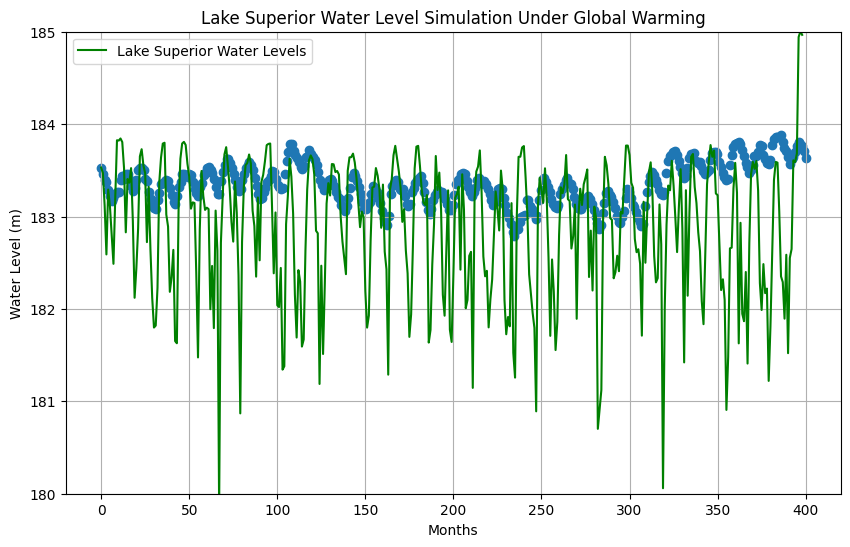

In [1047]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
n = 399  # Number of steps
initial_water_level = 183.53  # Initial water level for Lake Superior

# Initialize water levels
w = [initial_water_level]

# Consider Factors
p = (superior['precipitation'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
inflow = (superior['flow'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
e = (superior['evaporation'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
r = 0.0061

# Simulate water levels
for i in range(1, n):
    # Calculate the new water level
    new_level = w[i-1] - p[i-1] - e[i-1] - inflow[i-1]
    print([new_level, w[i-1], p[i-1], e[i-1], inflow[i-1]])
    w.append(max(new_level, 0))  # Prevent negative water levels

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, 400, 400), superior.iloc[-400:, 3])
plt.plot(range(n), w, label="Lake Superior Water Levels", color='green')
plt.xlabel("Months")
plt.ylabel("Water Level (m)")
plt.ylim(180, 185)

plt.title("Lake Superior Water Level Simulation Under Global Warming")
plt.legend()
plt.grid()
plt.show()



In [1020]:
len(range(1,n))

398

In [1021]:
superior['precipitation'].iloc[-400:].reset_index(drop=True) 

0      92.83
1      62.83
2      44.19
3      48.33
4      95.61
       ...  
395    84.40
396    84.43
397    77.31
398    98.83
399    85.05
Name: precipitation, Length: 400, dtype: float64

In [1022]:
superior.iloc[-400:-398,:]

,month,year,lake,water level,evaporation,flow,precipitation,simulated_water_level
452,9,1987,Superior,183.53,69.25,462.91,92.83,183.769654
453,10,1987,Superior,183.46,70.64,549.77,62.83,183.769131


In [1023]:
test = superior.iloc[-400:-398,:]

In [1024]:
test['evaporation'] = test['evaporation'] / 1000
test['precipitation'] = test['precipitation'] / 1000
test['flow'] = test['flow'] / 1000

/var/folders/69/ysm8yfcn76s_32xvcxfbp8s00000gn/T/ipykernel_40199/2225165625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['evaporation'] = test['evaporation'] / 1000
/var/folders/69/ysm8yfcn76s_32xvcxfbp8s00000gn/T/ipykernel_40199/2225165625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['precipitation'] = test['precipitation'] / 1000
/var/folders/69/ysm8yfcn76s_32xvcxfbp8s00000gn/T/ipykernel_40199/2225165625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [1025]:
test.iloc[:, 3:].diff(axis = 0)

,water level,evaporation,flow,precipitation,simulated_water_level
452,NaN,NaN,NaN,NaN,NaN
453,-0.07,0.00139,0.08686,-0.03,-0.000523


In [1026]:
test

,month,year,lake,water level,evaporation,flow,precipitation,simulated_water_level
452,9,1987,Superior,183.53,0.06925,0.46291,0.09283,183.769654
453,10,1987,Superior,183.46,0.07064,0.54977,0.06283,183.769131


In [1027]:
(superior['precipitation'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna()

1     -0.03000
2     -0.01864
3      0.00414
4      0.04728
5     -0.01084
        ...   
395    0.01718
396    0.00003
397   -0.00712
398    0.02152
399   -0.01378
Name: precipitation, Length: 399, dtype: float64

In [1028]:
len(range(1,n+1))

399

# Model Correctly shows relationship at specific months. 

current hypothesis is that flow is the reason there is so much variance. Attempting to find a proper weight.

In [1029]:
correlation_matrix = superior[['precipitation', 'flow', 'evaporation']].corr()
print(correlation_matrix)


               precipitation      flow  evaporation
precipitation       1.000000  0.018626     0.054001
flow                0.018626  1.000000    -0.017781
evaporation         0.054001 -0.017781     1.000000


In [1030]:
p = (superior['precipitation'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
inflow = (superior['flow'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
e = (superior['evaporation'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)

inflow.describe()

count    399.000000
mean      -0.003666
std        0.687771
min       -2.835960
25%       -0.364755
50%        0.020290
75%        0.344805
max        2.808590
Name: flow, dtype: float64

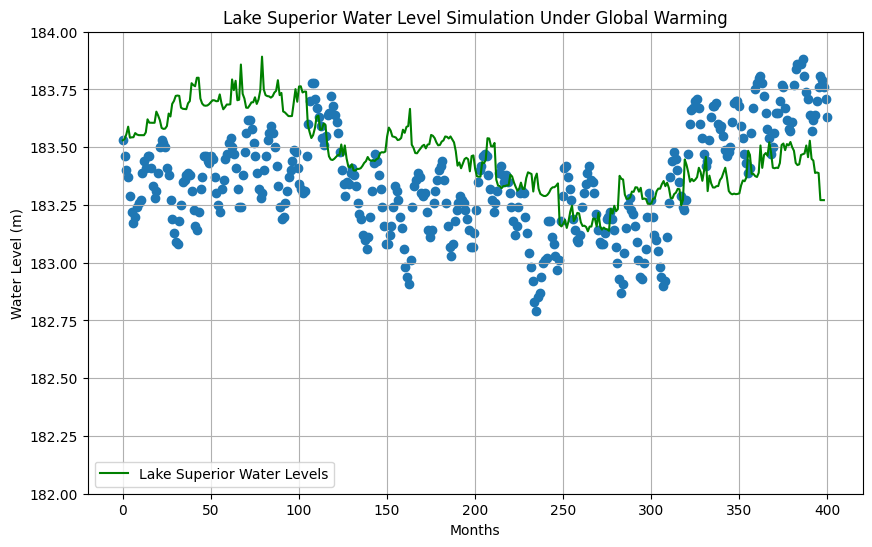

In [1059]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
n = 399  # Number of steps
initial_water_level = 183.53  # Initial water level for Lake Superior

# Initialize water levels
w = [initial_water_level]

# Consider Factors
p = (superior['precipitation'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
e = (superior['evaporation'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
inflow = (superior['flow'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
r = 0.0061

# Stochastic RV for Runoff
alpha = np.random.uniform(-0.000019,0)
beta = np.random.uniform(0,0.00073)
gamma = np.random.uniform(-0.000366, 0)
tau = np.random.uniform(0, 0.0001)

# Simulate water levels
for i in range(1, n):
    # Calculate the new water level
    gamma = np.random.uniform(0, 0.1)
    new_level = w[i-1] + alpha * p[i-1] - beta * e[i-1] + gamma * inflow[i-1] - tau * r * w[i-1]

    w.append(max(new_level, 0))  # Prevent negative water levels

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, 400, 400), superior.iloc[-400:, 3])
plt.plot(range(n), w, label="Lake Superior Water Levels", color='green')
plt.xlabel("Months")
plt.ylabel("Water Level (m)")
plt.ylim(182, 184)

plt.title("Lake Superior Water Level Simulation Under Global Warming")
plt.legend()
plt.grid()
plt.show()



# Different model with only one weight (doesn't work)

In [1271]:
approx = superior['water level'].iloc[-399:].reset_index(drop=True) + p - e + inflow

In [1251]:
actual = superior['water level'].iloc[-399:].reset_index(drop=True)

In [1280]:
superior.iloc[-399:].reset_index(drop=True).head()


,month,year,lake,water level,evaporation,flow,precipitation,simulated_water_level
0,10,1987,Superior,183.46,70.64,549.77,62.83,183.769131
1,11,1987,Superior,183.40,73.14,920.41,44.19,183.764195
2,12,1987,Superior,183.37,24.80,1492.03,48.33,183.760840
3,1,1988,Superior,183.29,22.89,744.80,95.61,183.767356
4,2,1988,Superior,183.22,35.98,924.02,84.77,183.770545


In [1276]:
approx = [initial_water_level]
for i in range(1, n):
    # Calculate the new water level
    new_level = w[i-1] + p[i-1] - e[i-1] + inflow[i-1]

    approx.append(max(new_level, 0))  # Prevent negative water levels


(actual - approx).describe()

approx = [initial_water_level]



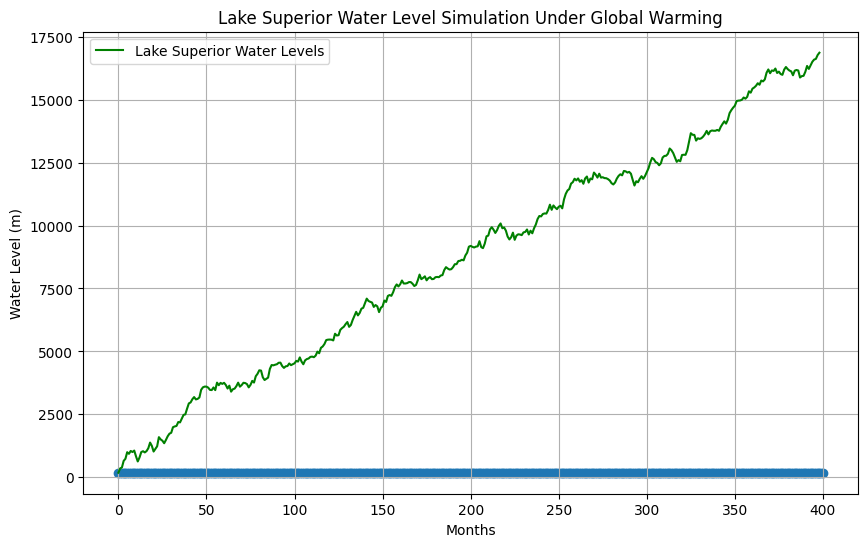

In [1261]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
n = 399  # Number of steps
initial_water_level = 183.53  # Initial water level for Lake Superior

# Initialize water levels
w = [initial_water_level]

# Consider Factors
p = (superior['precipitation'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
inflow = (superior['flow'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
e = (superior['evaporation'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
r = 0.0061

# water runoff
alpha = np.random.uniform(-0.000019,0)
beta = np.random.uniform(0,0.00073)
gamma = np.random.uniform(-0.000366, 0)
tau = np.random.uniform(0, 0.0001)
epsilon = np.random.normal(error.mean() - error.std(),error.mean() + error.std())

# Simulate water levels
for i in range(1, n):
    # Calculate the new water level
    epsilon = np.random.normal(error.mean() - error.std(),error.mean() + error.std())
    new_level = w[i-1] + p[i-1] + inflow[i-1] - e[i-1] + epsilon

    w.append(max(new_level, 0))  # Prevent negative water levels

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, 400, 400), superior.iloc[-400:, 3])
plt.plot(range(n), w, label="Lake Superior Water Levels", color='green')
plt.xlabel("Months")
plt.ylabel("Water Level (m)")
plt.title("Lake Superior Water Level Simulation Under Global Warming")
plt.legend()
plt.grid()
plt.show()



# Model with normal RV

### Seasonality Consideration

In [1210]:
# Want to find the months that have the largest runoff

model_superior = superior.iloc[-400:].reset_index(drop=True)
model_superior['evaporation'] = model_superior['evaporation'] / 1000
model_superior['flow'] = model_superior['flow'] / 1000
model_superior['precipitation'] = model_superior['precipitation'] / 1000
model_superior = model_superior.drop(columns="simulated_water_level")

seasonal_flow = {}
for i in range(1,13):
    x = model_superior[model_superior['month'] == i].iloc[:,5].mean()
    seasonal_flow.update({i:x})
    
sorted(seasonal_flow.items(), key = lambda x:x[1])
# The months with the largest runoff are April, March, January, December, May, February
# The months with the least runoff are September, August, July, October, June, November


# What is the average change in runoff for a given month?

seasonal_flow_change = {}
for i in range(1,13):
    x = model_superior[model_superior['month'] == i].iloc[:,5].diff().dropna().reset_index(drop=True).mean()
    seasonal_flow_change.update({i:x})
    

value = [key for value, key in seasonal_flow_change.items()]
print(f"{np.min(value)}, {seasonal_flow_change}")

keys_to_extract = [9,8,7,10,6,11]
low_runoff = {key: seasonal_flow_change[key] for key in keys_to_extract if key in seasonal_flow_change}
value = [key for value, key in low_runoff.items()]
print(f"{np.max(value)}, {low_runoff}")


    

-0.07551575757575758, {1: np.float64(0.04097312499999997), 2: np.float64(0.014367500000000002), 3: np.float64(0.03633093750000001), 4: np.float64(-0.005899375000000012), 5: np.float64(0.01325749999999997), 6: np.float64(0.005500624999999995), 7: np.float64(0.006450000000000006), 8: np.float64(0.0020950000000000066), 9: np.float64(-0.044330303030303025), 10: np.float64(-0.04696242424242424), 11: np.float64(-0.058193939393939374), 12: np.float64(-0.07551575757575758)}
0.006450000000000006, {9: np.float64(-0.044330303030303025), 8: np.float64(0.0020950000000000066), 7: np.float64(0.006450000000000006), 10: np.float64(-0.04696242424242424), 6: np.float64(0.005500624999999995), 11: np.float64(-0.058193939393939374)}


In [1211]:
model_superior['flow'].describe()

count    400.000000
mean       1.129999
std        0.755669
min       -0.999990
25%        0.556573
50%        0.943975
75%        1.623197
max        4.174830
Name: flow, dtype: float64

In [1212]:
inflow.describe()

count    399.000000
mean      -0.003666
std        0.687771
min       -2.835960
25%       -0.364755
50%        0.020290
75%        0.344805
max        2.808590
Name: flow, dtype: float64

[count    399.000000
mean       0.389162
std        0.449662
min       -0.426436
25%        0.069417
50%        0.283847
75%        0.581336
max        1.492457
Name: water level, dtype: float64, -0.08084681611223038, 0.05368639089077849, 0.03932534685020616, 0.002492049223417931]


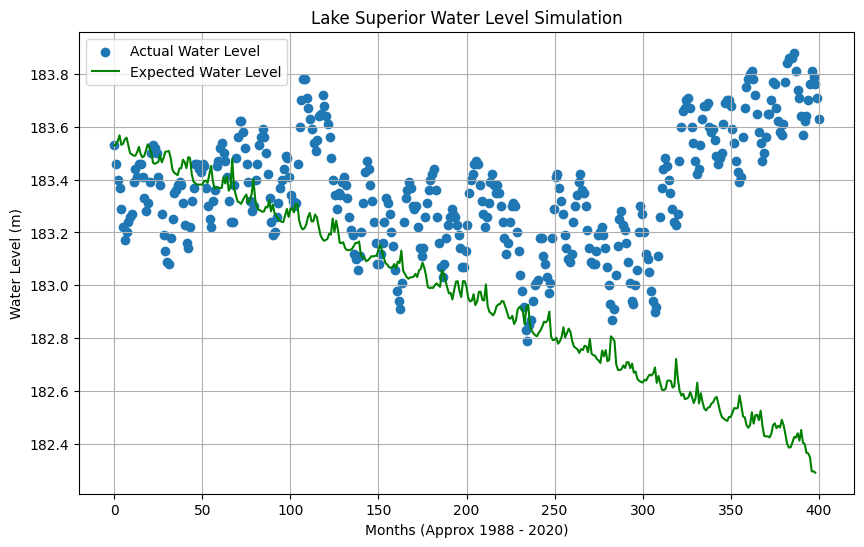

In [1213]:
actual = superior['water level'].iloc[-399:].reset_index(drop = True)
# Parameters
n = 399  # Number of steps
initial_water_level = 183.53  # Initial water level for Lake Superior

# Initialize water levels
w = [initial_water_level]

# Consider Factors
p = (superior['precipitation'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
e = (superior['evaporation'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
inflow = (superior['flow'].iloc[-400:].reset_index(drop = True) / 1000).diff().dropna().reset_index(drop = True)
r = 0.0065

# Stochastic RV
alpha = np.random.normal(-0.040699, 0.040661)
beta = np.random.normal(-0.021924,0.02207)
#gamma = np.random.normal(-0.691, 0.68404)
tau = np.random.uniform(0,0.003)


# Simulate water levels
for i in range(1, n):   
    
    #Seasonality Runoff
    if model_superior.iloc[i, 5] in [9,8,7,10,6,11]: # Months with Lowest Runoff
        gamma = np.random.uniform(-0.0588, -0.0064) # Avg change in Runoff (Sep, November)
    elif model_superior.iloc[i, 5] in [4,3,1,12,5,2]: # Months with Highest Runoff
        gamma = np.random.uniform(-0.075, 0.0409) # Avg change in Runoff (Apr, Feb)
          
    # Calculate the new water level
    new_level = w[i-1] + (alpha * p[i-1]  + gamma * inflow[i-1]) - (beta * e[i-1] + tau * r * w[i-1])

    w.append(max(new_level, 0))  # Prevent negative water levels


# Model Accuracy
summary_stats = [(actual - w).describe(), alpha, beta, gamma, tau]
print(summary_stats)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, 400, 400), superior.iloc[-400:, 3], label = "Actual Water Level")
plt.plot(range(n), w, label="Expected Water Level", color='green')
plt.xlabel("Months (Approx 1988 - 2020)")
plt.ylabel("Water Level (m)")
#plt.ylim(182, 184)
plt.title("Lake Superior Water Level Simulation")
plt.legend()
plt.grid()
plt.show()



In [1214]:
df['lake'].unique()



KeyError: 'lake'

In [1042]:

michigan = df[df['lake'] == 'Michigan-Huron']
clair = df[df['lake'] == 'St. Clair']
erie = df[df['lake'] == 'Erie']
ontario = df[df['lake'] == 'Ontario']



superior['water level']

0      183.42
1      183.37
2      183.33
3      183.37
4      183.57
        ...  
847    183.81
848    183.79
849    183.76
850    183.71
851    183.63
Name: water level, Length: 852, dtype: float64

In [1043]:
import pandas as pd

# Example raw data
data = [superior['water level'],
        michigan['water level'],
        clair['water level'],
        erie['water level'],
        ontario['water level']]

# Convert to DataFrame
categories = ['Superior', 'Michigan', 'St. Clair', 'Erie', 'Ontario']
state = pd.DataFrame(data, index=categories, columns=categories)

# Normalize rows (convert to percentages)
normalized_state = state.div(state.sum(axis=1), axis=0)

# Print the resulting table
print(normalized_state)


           Superior  Michigan  St. Clair  Erie  Ontario
Superior        NaN       NaN        NaN   NaN      NaN
Michigan        NaN       NaN        NaN   NaN      NaN
St. Clair       NaN       NaN        NaN   NaN      NaN
Erie            NaN       NaN        NaN   NaN      NaN
Ontario         NaN       NaN        NaN   NaN      NaN


In [1046]:
import pandas as pd

# Example raw data
data = [[500, 0, 3, 0, 0],
        [0, 390, 11, 0, 0],
        [1, 10, 360, 40, 0],
        [0, 0, 2, 110, 88],
        [0, 0, 0, 30, 51]]

# Convert to DataFrame
categories = ['Superior', 'Michigan', 'Huron', 'Erie', 'Ontario']
df = pd.DataFrame(data, index=categories, columns=categories)

# Normalize rows (convert to percentages)
normalized_df = df.div(df.sum(axis=1), axis=0)

# Print the resulting table
print(normalized_df)


,Superior,Michigan,Huron,Erie,Ontario
Superior,500,0,3,0,0
Michigan,0,390,11,0,0
Huron,1,10,360,40,0
Erie,0,0,2,110,88
Ontario,0,0,0,30,51
